# INX Future Inc Employee Performance - Project

INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider
with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5
years. INX human resource policies are considered as employee friendly and widely perceived as best
practices in the industry.
Recent years, the employee performance indexes are not healthy and this is becoming a growing
concerns among the top management. There has been increased escalations on service delivery and
client satisfaction levels came down by 8 percentage points.
The company knows the issues but concerned to take any actions in penalizing non-performing
employees as this would affect the employee morale of all the employees in general and may further
reduce the performance. Also, the market perception best employer and thereby attracting best talents
to join the company.
The company decided to initiate a data science project , which analyses the current employee data and find
the core underlying causes of this performance issues. The findings of this project will help the company to take right course of actions. The company also expects a clear indicators of non performing employees, so that any penalization of non-performing employee, if required, may not significantly affect other employee morals.

We will use the dataset made by the company. The data contains both numerical and object input variables. The data has twenty six features and one target variable which is the performance rating. The data has the following definitions:

EmpEducationLevel	1 'Below College'
	                2 'College'
	                3 'Bachelor'
	                4 'Master'
	                5 'Doctor'
	
EmpEnvironmentSatisfaction	1 'Low'
	                        2 'Medium'
	                        3 'High'
	                        4 'Very High'
	
EmpJobInvolvement	1 'Low'
	                2 'Medium'
	                3 'High'
	                4 'Very High'
	
EmpJobSatisfaction	1 'Low'
	                2 'Medium'
	                3 'High'
	                4 'Very High'
	
PerformanceRating	1 'Low'
	                2 'Good'
	                3 'Excellent'
	                4 'Outstanding'
	
RelationshipSatisfaction	1 'Low'
	                        2 'Medium'
	                        3 'High'
	                        4 'Very High'
	
EmpWorkLifeBalance	1 'Bad'
	                2 'Good'
	                3 'Better'
	                 4 'Best'
                     
The main goals of this project are:
1. To have a view of how the departments performed.
2. To identify three important factors that affect employees performance.
3. To traine a model which can predict the employee performance based on factors as inputs which will be used to hire employees.
4. To come up with recommendations to improve the employee performance based on insights from analysis.


In [35]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')



In [2]:
#reading the dataset
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [3]:
#checking the datatype in the column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [4]:
#checking for missing values
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

There were no missing values.

In [5]:
#checking for duplicated rows
data.duplicated().sum()

0

There were no repeated rows

In [6]:
#Shape of the data
data.shape

(1200, 28)

The data has 1200 rows and 28 columns

In [7]:
#dropping the EmpNumber column
data.drop('EmpNumber', axis = 1, inplace = True)

In [8]:
#checking the first 5 rows of the dataset
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


# Exploratory Data Analysis

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfaction

Most of the features are in the dataset are numerical(int64 type) and the are 19 in number. The rest are caregorical(object type) and they are 8 in number.

In [10]:
#Summary statistics for numerical columns
data.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
Age,1200.000000,36.918333,9.087289,18.000000,30.000000,36.000000,43.000000,60.000000
DistanceFromHome,1200.000000,9.165833,8.176636,1.000000,2.000000,7.000000,14.000000,29.000000
EmpEducationLevel,1200.000000,2.892500,1.044120,1.000000,2.000000,3.000000,4.000000,5.000000
EmpEnvironmentSatisfaction,1200.000000,2.715833,1.090599,1.000000,2.000000,3.000000,4.000000,4.000000
EmpHourlyRate,1200.000000,65.981667,20.211302,30.000000,48.000000,66.000000,83.000000,100.000000
EmpJobInvolvement,1200.000000,2.731667,0.707164,1.000000,2.000000,3.000000,3.000000,4.000000
EmpJobLevel,1200.000000,2.067500,1.107836,1.000000,1.000000,2.000000,3.000000,5.000000
EmpJobSatisfaction,1200.000000,2.732500,1.100888,1.000000,2.000000,3.000000,4.000000,4.000000
NumCompaniesWorked,1200.000000,2.665000,2.469384,0.000000,1.000000,2.000000,4.000000,9.000000
EmpLastSalaryHikePercent,1200.000000,15.222500,3.625918,11.000000,12.000000,14.000000,18.000000,25.000000


In [11]:
#Summary statistics for categorical columns
data.describe(include = ['object']).T

,count,unique,top,freq
Gender,1200,2,Male,725
EducationBackground,1200,6,Life Sciences,492
MaritalStatus,1200,3,Married,548
EmpDepartment,1200,6,Sales,373
EmpJobRole,1200,19,Sales Executive,270
BusinessTravelFrequency,1200,3,Travel_Rarely,846
OverTime,1200,2,No,847
Attrition,1200,2,No,1022


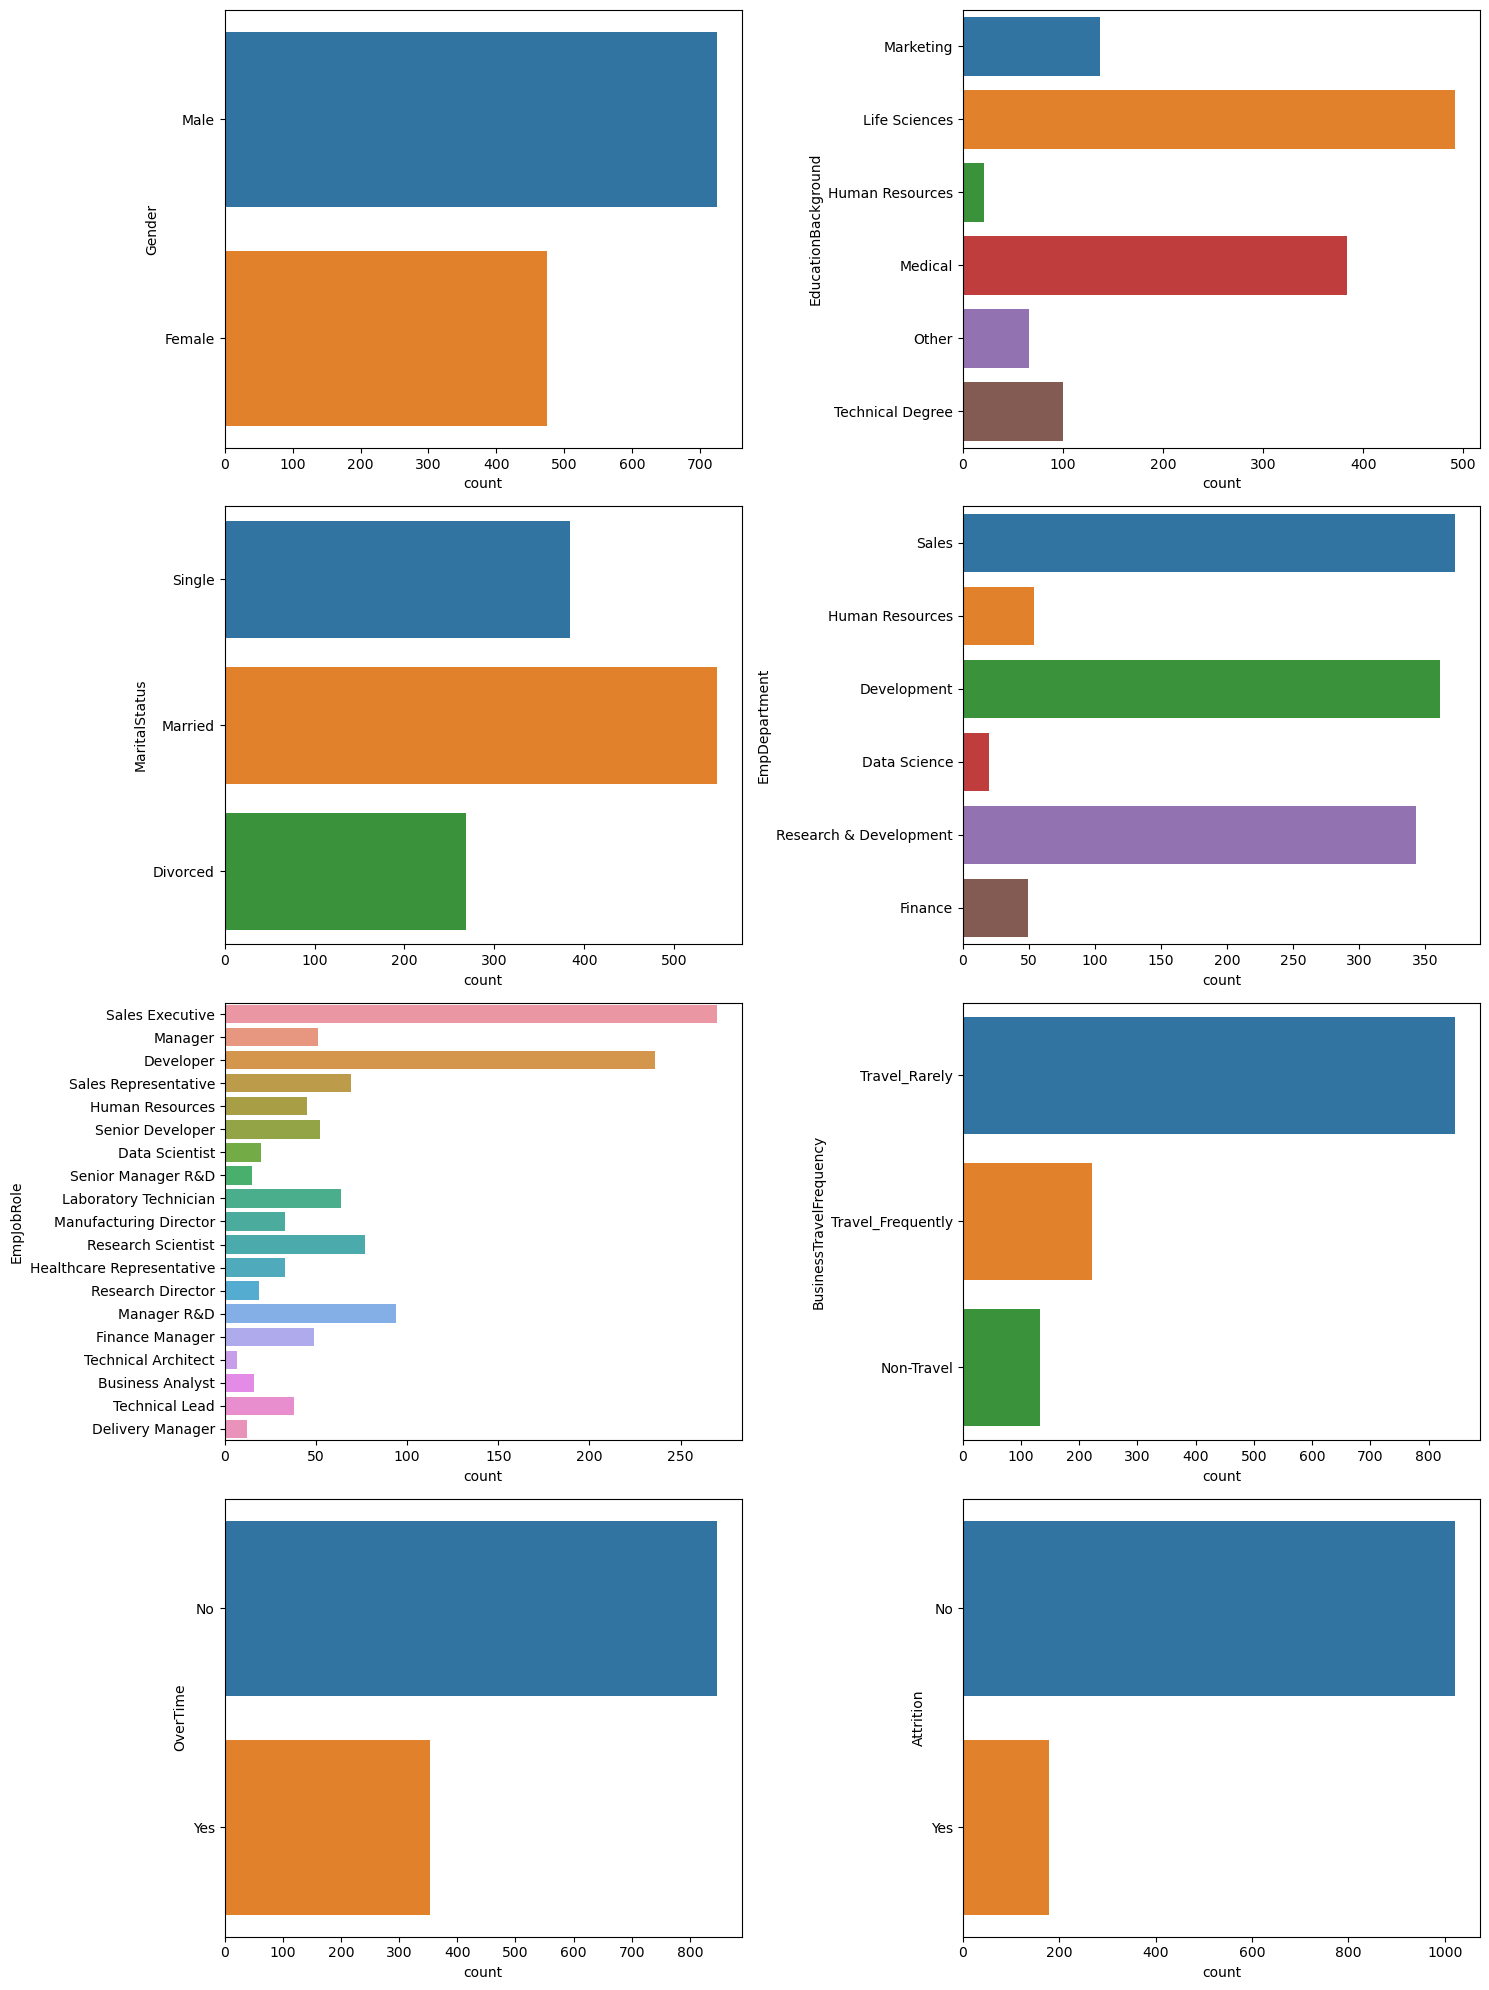

In [12]:
#Visualisation of categorical columns
cat_column = ['Gender','EducationBackground', 'MaritalStatus', 
              'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime','Attrition']

fig, axs = plt.subplots(4,2, figsize = (15,20))

for i, col in enumerate(cat_column):
    row = i//2
    col = i%2
    
    sns.countplot(y = data[cat_column[i]], ax = axs[row,col])

plt.tight_layout()
plt.show()

From the summary statistics and visualisation

Gender:
Has two unique features male and female. Majority of the employees are male and they are 765 in number.

EducationBackground:
This is the area of study of the employees. There are 6 area of study which include Life Sciences, Marketing, Human Resources, Medical, Technical Degree and Other. Most employees studied Life Sciences. Those who studied life sciences are 492. The least studied area is Human Resource.

MaritalStatus:
Has three unique features. They include single, married and divoced. 548 of the employees are married. They are the majority then followed by those who have not been married. Divorced employees are the minority.

EmpDepartment:
The company has six departments. They include Sales, Development, Human resource, Research and Development, Data Science and Finance. Sales department has the highest number of employees. The department has 343 employees. Data Science department has the least number of employees.

EmpJobRole:
There are 19 roles played by the employees these roles are Sales Executive, Manager, Developer, Sale Represensatives, Human Resources, Senior Developer, Data Scientist, Senior Manager R&D, Laboratory Technician, Manufacturing Director, Research Scientist, Healthcare Representatives, Research Director, Manager R&D, Finance Manager, Technical Architect, Business Analyst, Technical Lead and Delivery Manger. Most employees played the role of Sales Executive and they are 270 in number. The least played role is Technical Architect

BusinessTravelFrequency:
There are three categories of employees who travel frequently. Categories are Travel_Rarely, Travel_Frequently and Non_Travel. Majority of employees, 846 in number travelled rarely. Those who didn't travel at all are the minority.

OverTime:
Majority of the employees, 847 didn't work overtime.

Attrition:
Majority of the employees, 1022 in number did not depart from the company.

 

In [13]:
data['PerformanceRating'].value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

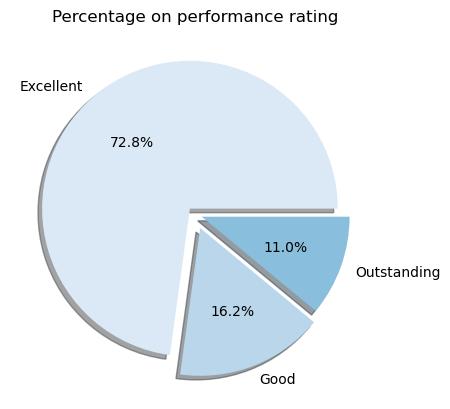

In [15]:
# define Seaborn color palette to use
palette_color = sns.color_palette('Blues')
label = ['Excellent','Good','Outstanding']
  
# plotting data on chart
plt.pie(data['PerformanceRating'].value_counts(), labels = label,
        shadow = True, explode = (0.05,0.1,0.05),
        colors=palette_color, autopct='%1.1f%%')

plt.title('Percentage on performance rating')
  
# displaying chart
plt.show()

There were no employees that had low performance. 16.2% had good performance, 72.8% had an excellent performance and 11.0% had an outstanding performance.

In [16]:
#count performance ratings in terms of gender
gender_performance = pd.crosstab(data['Gender'],data['PerformanceRating'])
gender_performance

PerformanceRating,2,3,4
Gender,,,
Female,75,349,51
Male,119,525,81


Majority of the male employees had an outstanding performance than female employees even though they are the majority. The same applies to all other performance ratings

In [17]:
#count on performance ratings in terms of department
department_performance = pd.crosstab(data['EmpDepartment'], data['PerformanceRating'])
department_performance

PerformanceRating,2,3,4
EmpDepartment,,,
Data Science,1,17,2
Development,13,304,44
Finance,15,30,4
Human Resources,10,38,6
Research & Development,68,234,41
Sales,87,251,35


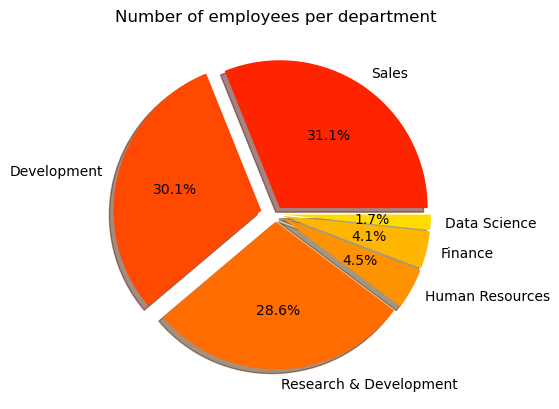

In [18]:
# define Seaborn color palette to use
palette_color = sns.color_palette('autumn')
label = ['Sales','Development','Research & Development','Human Resources','Finance','Data Science ']
  
# plotting data on chart
plt.pie(data['EmpDepartment'].value_counts(), labels = label,
        shadow = True, explode = (0.05,0.1,0.05,0.05,0.05,0.05),
        colors=palette_color, autopct='%1.1f%%')

plt.title('Number of employees per department')
  
# displaying chart
plt.show()

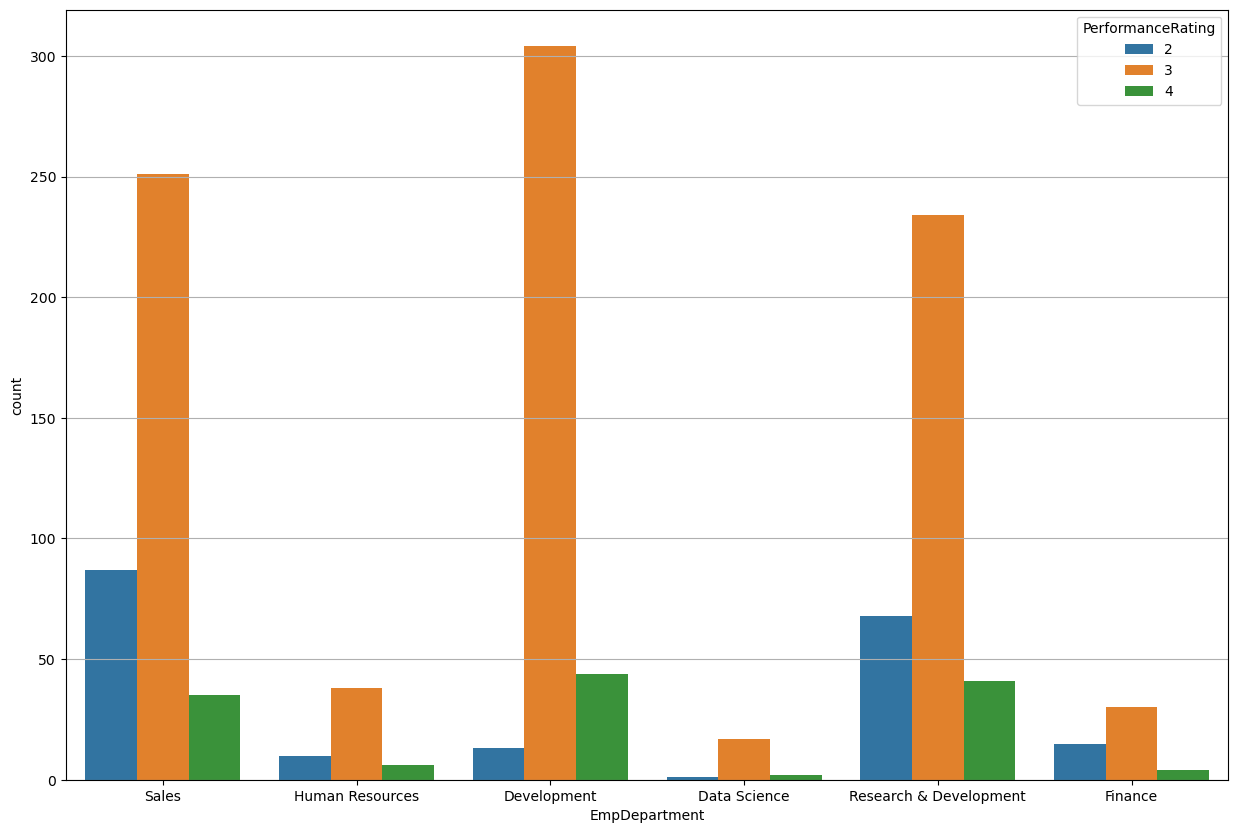

In [19]:
# visualisation Count on perfomance rating in the departments
plt.figure(figsize = (15,10))
sns.countplot(data = data, x ='EmpDepartment', hue ='PerformanceRating' )
plt.grid(axis ='y')
plt.show()

Despite sales department having the highest number of employees, Developement department had the highest number of both excellent and outstanding performance. 

Text(0, 0.5, 'Departments')

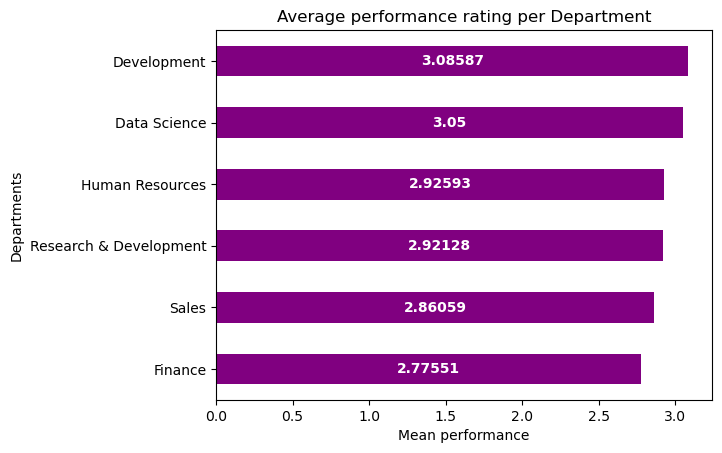

In [20]:
#visualisation on average performance per department
x = data.groupby('EmpDepartment')['PerformanceRating'].mean().sort_values(ascending = True)

ax = x.plot(kind = 'barh', color = 'purple', title ='Average performance rating per Department')
ax.bar_label(ax.containers[0], label_type='center', color='white', weight='bold')
plt.xlabel('Mean performance')
plt.ylabel('Departments')

Development department perfomed better in average performance. Data Science being a department with least number of employees was the second best. Sales and Finance are trailing in terms of average performance rating.

<Figure size 1000x1500 with 0 Axes>

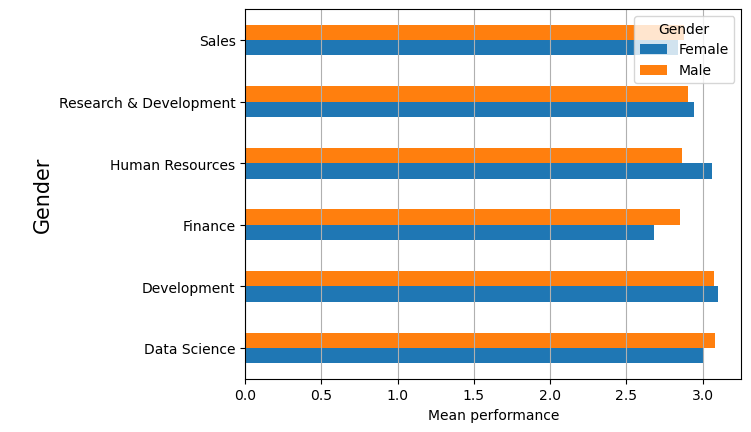

<Figure size 1000x1500 with 0 Axes>

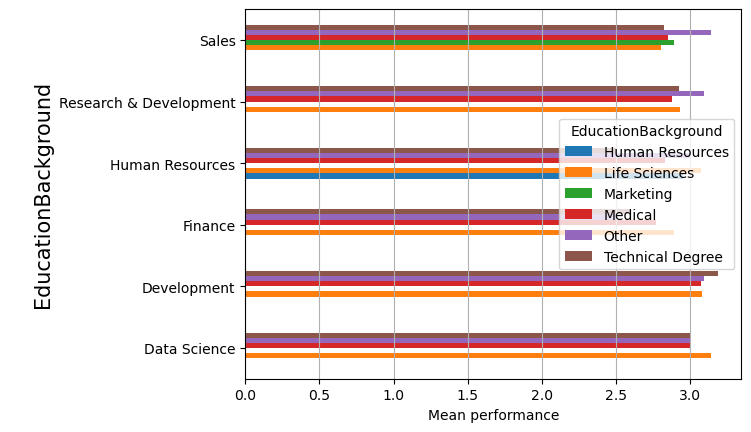

<Figure size 1000x1500 with 0 Axes>

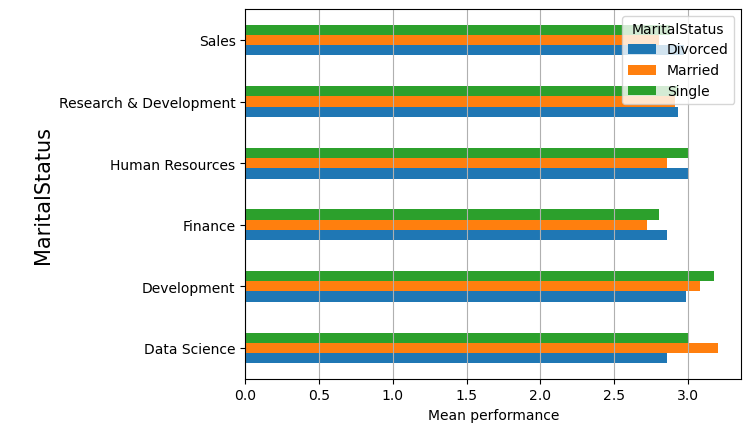

<Figure size 1000x1500 with 0 Axes>

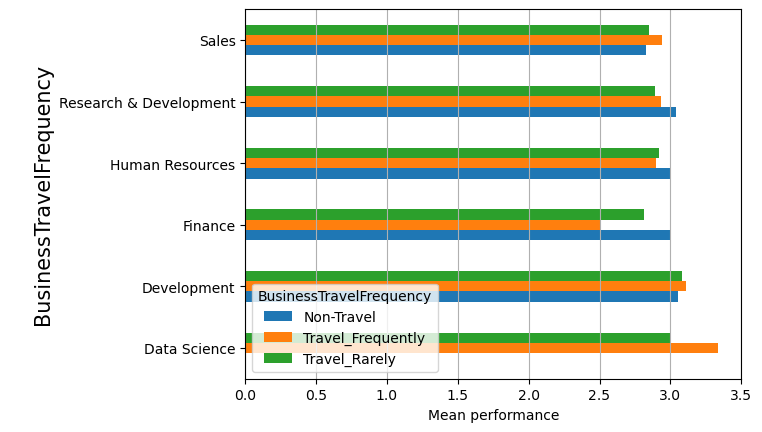

<Figure size 1000x1500 with 0 Axes>

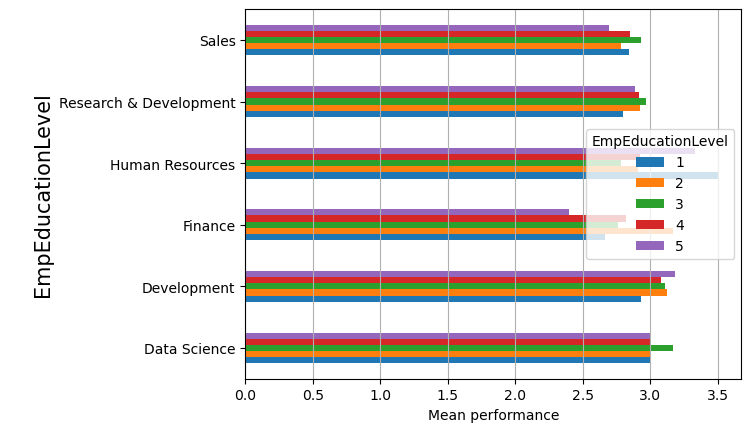

<Figure size 1000x1500 with 0 Axes>

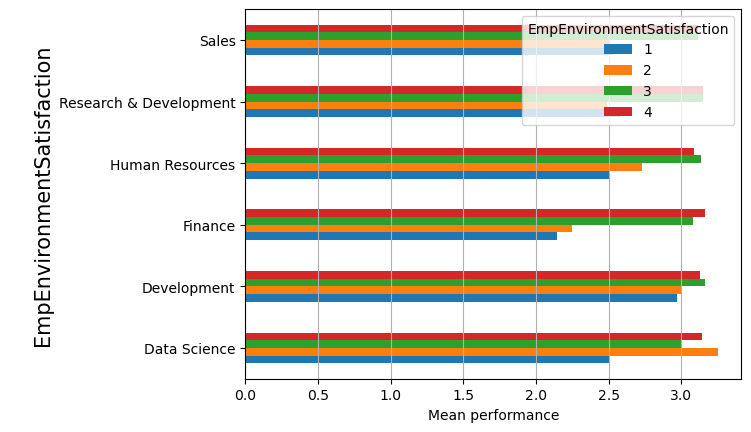

<Figure size 1000x1500 with 0 Axes>

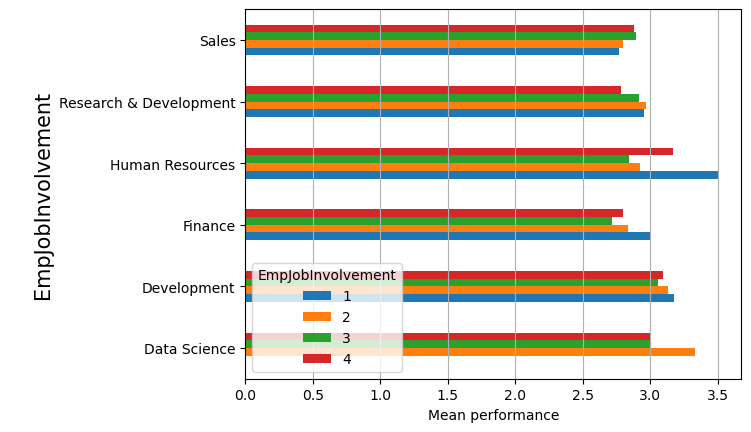

<Figure size 1000x1500 with 0 Axes>

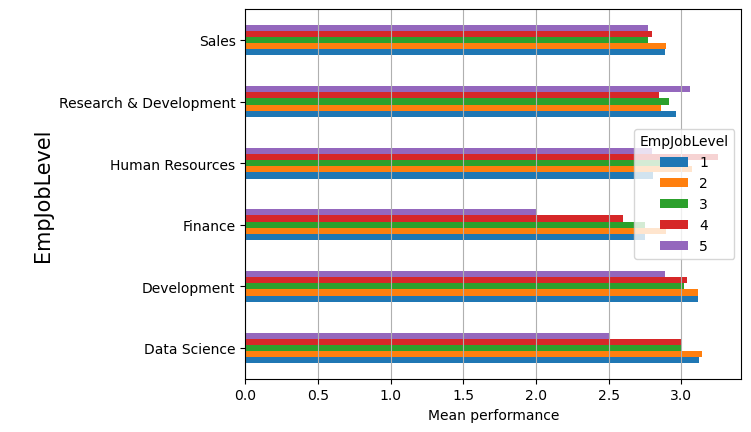

<Figure size 1000x1500 with 0 Axes>

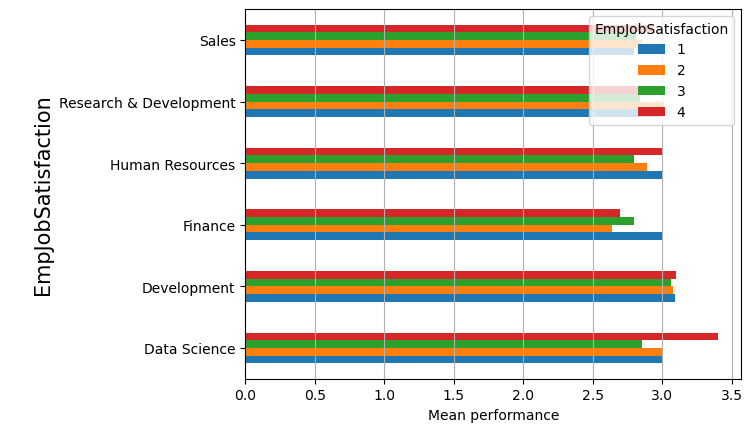

<Figure size 1000x1500 with 0 Axes>

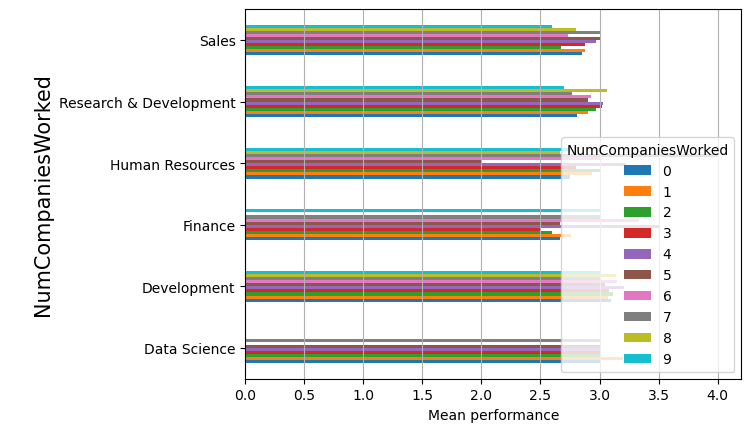

<Figure size 1000x1500 with 0 Axes>

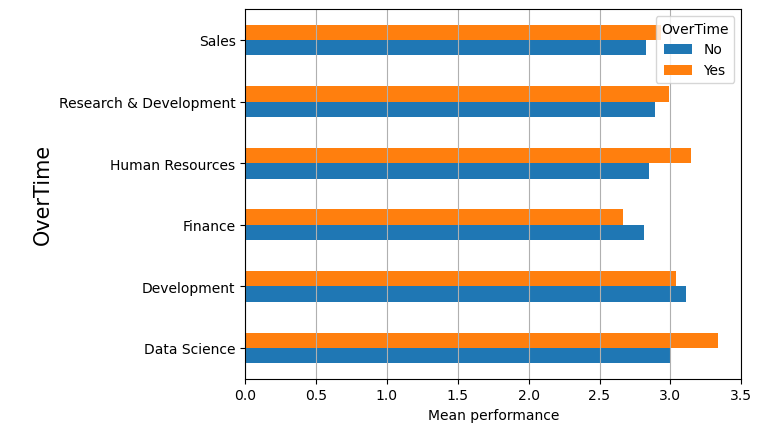

<Figure size 1000x1500 with 0 Axes>

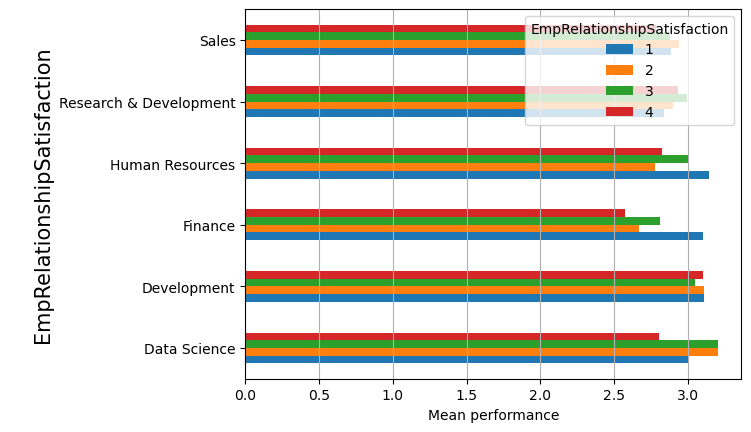

<Figure size 1000x1500 with 0 Axes>

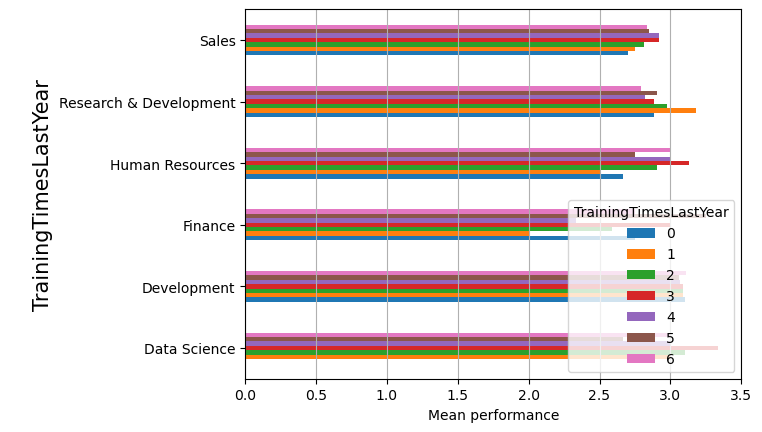

<Figure size 1000x1500 with 0 Axes>

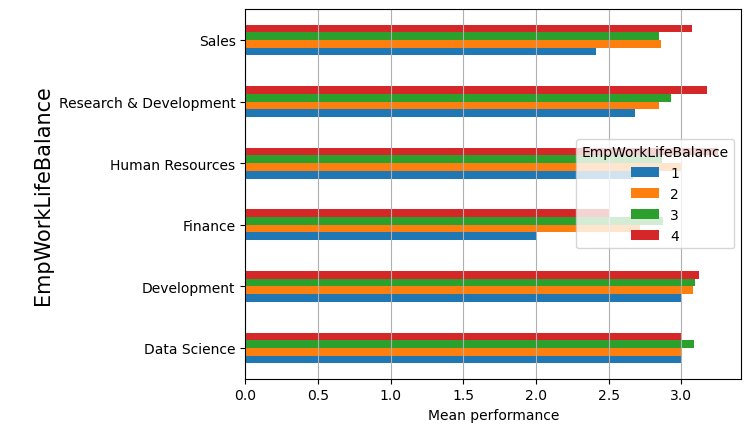

<Figure size 1000x1500 with 0 Axes>

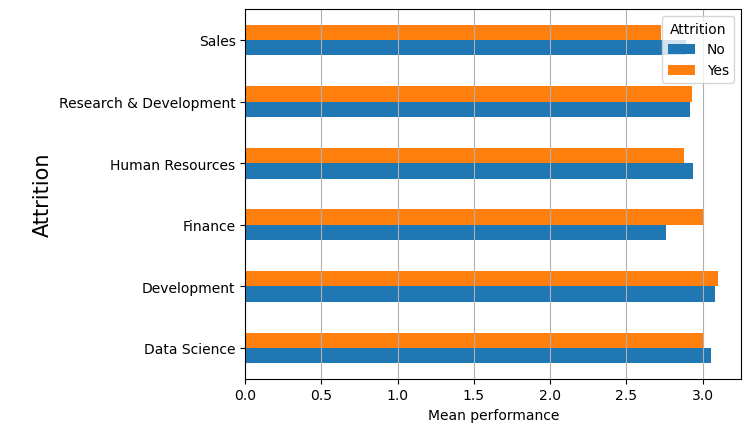

In [21]:
#visualising average perfomance rating for different departments using the features
cat_columns =data[['Gender', 'EducationBackground','MaritalStatus', 'BusinessTravelFrequency',
                   'EmpEducationLevel', 'EmpEnvironmentSatisfaction','EmpJobInvolvement', 'EmpJobLevel','EmpJobSatisfaction', 
                   'NumCompaniesWorked', 'OverTime','EmpRelationshipSatisfaction','TrainingTimesLastYear','EmpWorkLifeBalance',
                   'Attrition']]

for i in cat_columns:
  plt.figure(figsize = (10,15))
  data.groupby(['EmpDepartment',i])['PerformanceRating'].mean().unstack(level=1).plot(kind='barh')
  plt.grid(axis ='x')
  plt.ylabel(f'\n{i}', fontsize = 15)
  plt.xlabel('Mean performance')
  


1. Performance rating for female employees in human resources department was better than male. Male employees performed better in finance.
2. Employees who have other as education background performed better in sales and research & development departments. Those who studied life sciences did well in data science.
3. Single employees performed well in all the departments.
4. The employees who dont travel performs better in most of the departments.
5. In Human Resource department, employees who have below college as level of education performed better. Those who attended college performed well in Finance Department.
6. Those who had high and very high level of environment satisfaction had a good performance rating.
7. Employees who had low job involvement in Human Resource department perfomed better.In data Science, employees who had medium job involvement also performed better.
8. In Data science department, employee who have very high job satisfaction performed better. Employees who have low job satisfaction performed better in most of the departments.
9. Employees who had best life work balance have high performance rate in sales, research & Developememt and Human Resource.



# Group Analysis

In [22]:
#Selecting features to be grouped
df = data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','PerformanceRating','EmpDepartment']]

In [23]:
#checking first five rows of the dataframe df
df.head()

,Age,DistanceFromHome,EmpHourlyRate,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,EmpDepartment
0,32,10,55,12,10,10,7,0,8,3,Sales
1,47,14,42,12,20,7,7,1,7,3,Sales
2,40,5,48,21,20,18,13,1,12,4,Sales
3,41,10,73,15,23,21,6,12,6,3,Human Resources
4,60,16,84,14,10,2,2,2,2,3,Sales


In [24]:
#Grouping features and adding columns to the dataframe

df1 = df.assign(agegroup=pd.cut(df['Age'], bins=[10, 20,30 , 40, 50,60,70],right=False,
                                labels=['10-19','20-29','30-39', '40-49', '50-59','60-65']))
df2 =df1.assign(DistanceFromHomegroup=pd.cut(df['DistanceFromHome'], bins=[0,5,10 , 15, 20,25,30], right=False, 
                                             labels=['0-4','5-9','10-14', '15-19', '20-24','25-29']))
df3 = df2.assign(EmpHourlyRategroup=pd.cut(df['EmpHourlyRate'], bins=[30,40,50,60,70,80,90,100,110], right=False,
                                           labels=['30-39','40-49','50-59','60-69','70-79','80-89','90-99','100 and above']))
df4 = df3.assign(EmpLastSalaryHikePercentgroup=pd.cut(df['EmpLastSalaryHikePercent'], bins=[10,15,20,25,30], right=False, 
                                                      labels=['10-14','15-29','20-24','25-29']))
df5 = df4.assign(TotalWorkExperienceInYearsgroup=pd.cut(df['TotalWorkExperienceInYears'], bins=[0,10,20,30,40,45], right=False,
                                                        labels=['0-9','10-19','20-29','30-39','40 and above']))
df6 = df5.assign(ExperienceYearsAtThisCompanygroup=pd.cut(df['ExperienceYearsAtThisCompany'], bins=[0,10,20,30,40,45], right=False, 
                                                          labels=['0-9','10-19','20-29','30-39','40 and above']))
df7 = df6.assign(ExperienceYearsInCurrentRolegroup=pd.cut(df['ExperienceYearsInCurrentRole'], bins=[0,5,10,15,20], right=False, 
                                                          labels=['0-4','5-9','10-14','15 and above']))
df8 = df7.assign(YearsSinceLastPromotiongroup=pd.cut(df['YearsSinceLastPromotion'], bins=[0,5,10,15,20], right=False, 
                                                     labels=['0-4','5-9','10-14','15 and above']))
df9=df7.assign(YearsWithCurrManagergroup=pd.cut(df['YearsWithCurrManager'], bins=[0,5,10,15,20], right=False, 
                                                labels=['0-4','5-9','10-14','15 and above']))

In [25]:
df9.head(5)

,Age,DistanceFromHome,EmpHourlyRate,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,EmpDepartment,agegroup,DistanceFromHomegroup,EmpHourlyRategroup,EmpLastSalaryHikePercentgroup,TotalWorkExperienceInYearsgroup,ExperienceYearsAtThisCompanygroup,ExperienceYearsInCurrentRolegroup,YearsWithCurrManagergroup
0,32,10,55,12,10,10,7,0,8,3,Sales,30-39,10-14,50-59,10-14,10-19,10-19,5-9,5-9
1,47,14,42,12,20,7,7,1,7,3,Sales,40-49,10-14,40-49,10-14,20-29,0-9,5-9,5-9
2,40,5,48,21,20,18,13,1,12,4,Sales,40-49,5-9,40-49,20-24,20-29,10-19,10-14,10-14
3,41,10,73,15,23,21,6,12,6,3,Human Resources,40-49,10-14,70-79,15-29,20-29,20-29,5-9,5-9
4,60,16,84,14,10,2,2,2,2,3,Sales,60-65,15-19,80-89,10-14,10-19,0-9,0-4,0-4


In [26]:
#checking null values
df9.isnull().sum()

Age                                  0
DistanceFromHome                     0
EmpHourlyRate                        0
EmpLastSalaryHikePercent             0
TotalWorkExperienceInYears           0
ExperienceYearsAtThisCompany         0
ExperienceYearsInCurrentRole         0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
PerformanceRating                    0
EmpDepartment                        0
agegroup                             0
DistanceFromHomegroup                0
EmpHourlyRategroup                   0
EmpLastSalaryHikePercentgroup        0
TotalWorkExperienceInYearsgroup      0
ExperienceYearsAtThisCompanygroup    0
ExperienceYearsInCurrentRolegroup    0
YearsWithCurrManagergroup            0
dtype: int64

In [27]:
#Creating a dataframe for visualisation
data2 = df9[['EmpDepartment','PerformanceRating','agegroup','DistanceFromHomegroup','EmpHourlyRategroup',
             'EmpLastSalaryHikePercentgroup','TotalWorkExperienceInYearsgroup','ExperienceYearsAtThisCompanygroup',
             'ExperienceYearsInCurrentRolegroup','YearsWithCurrManagergroup']]

In [28]:
#Cheking the first five rows of the new data frame formed
data2.head(5)

,EmpDepartment,PerformanceRating,agegroup,DistanceFromHomegroup,EmpHourlyRategroup,EmpLastSalaryHikePercentgroup,TotalWorkExperienceInYearsgroup,ExperienceYearsAtThisCompanygroup,ExperienceYearsInCurrentRolegroup,YearsWithCurrManagergroup
0,Sales,3,30-39,10-14,50-59,10-14,10-19,10-19,5-9,5-9
1,Sales,3,40-49,10-14,40-49,10-14,20-29,0-9,5-9,5-9
2,Sales,4,40-49,5-9,40-49,20-24,20-29,10-19,10-14,10-14
3,Human Resources,3,40-49,10-14,70-79,15-29,20-29,20-29,5-9,5-9
4,Sales,3,60-65,15-19,80-89,10-14,10-19,0-9,0-4,0-4


<Figure size 1000x800 with 0 Axes>

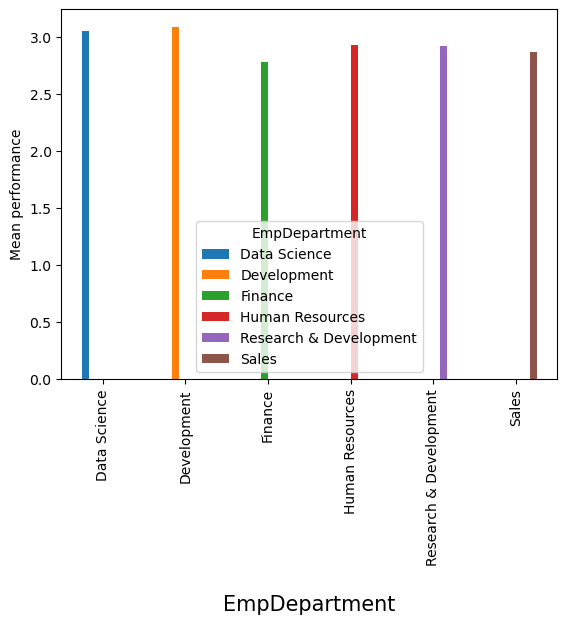

<Figure size 1000x800 with 0 Axes>

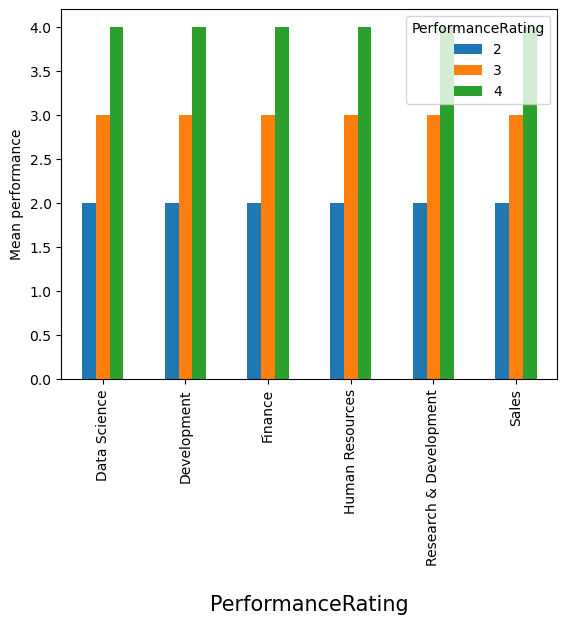

<Figure size 1000x800 with 0 Axes>

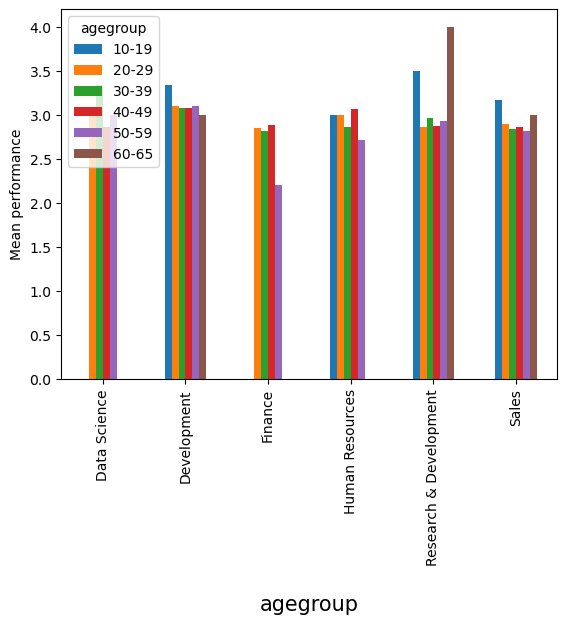

<Figure size 1000x800 with 0 Axes>

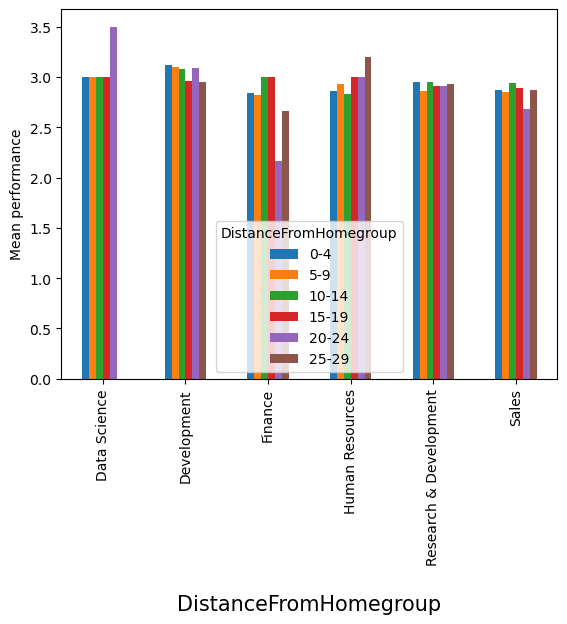

<Figure size 1000x800 with 0 Axes>

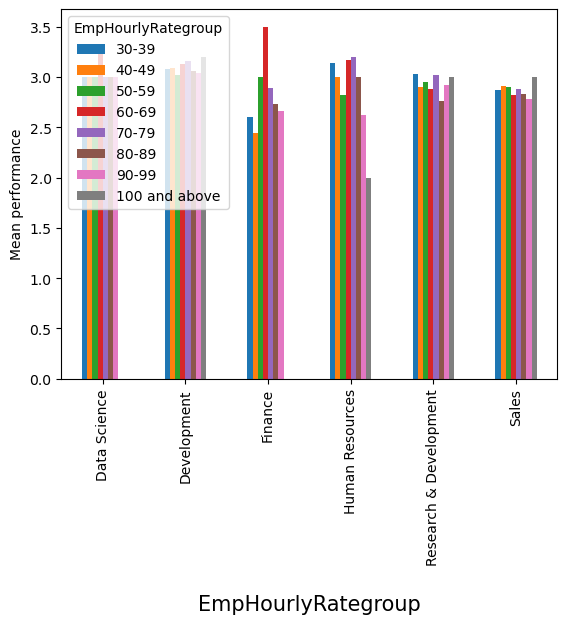

<Figure size 1000x800 with 0 Axes>

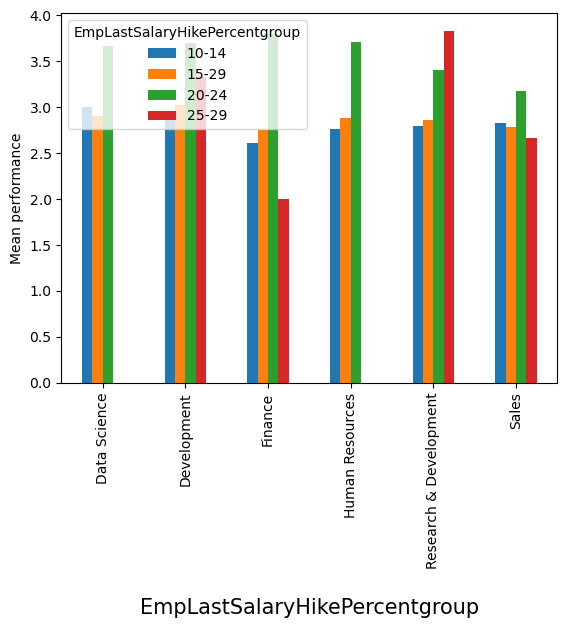

<Figure size 1000x800 with 0 Axes>

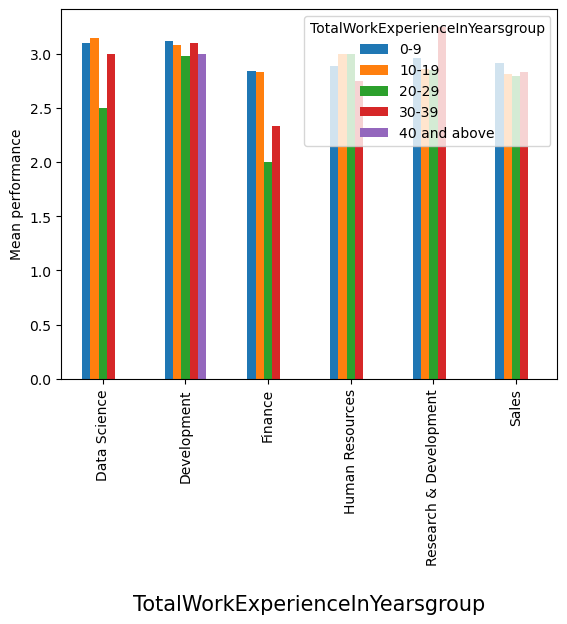

<Figure size 1000x800 with 0 Axes>

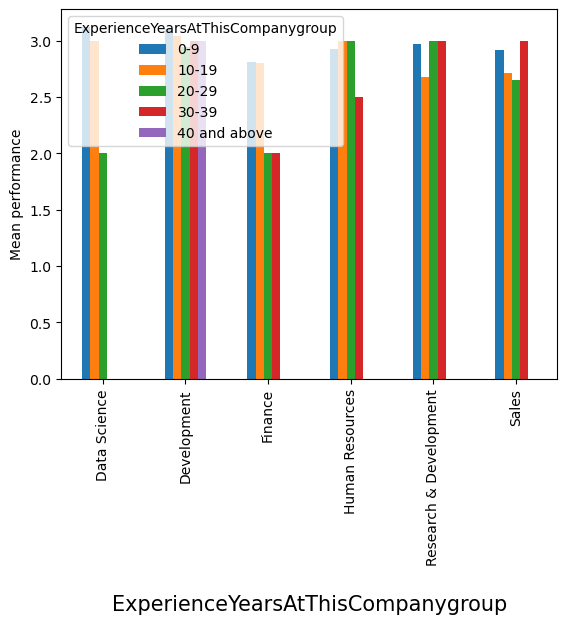

<Figure size 1000x800 with 0 Axes>

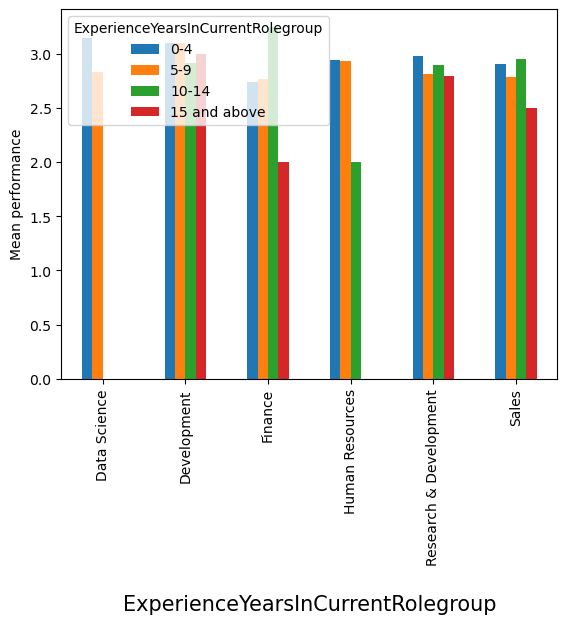

<Figure size 1000x800 with 0 Axes>

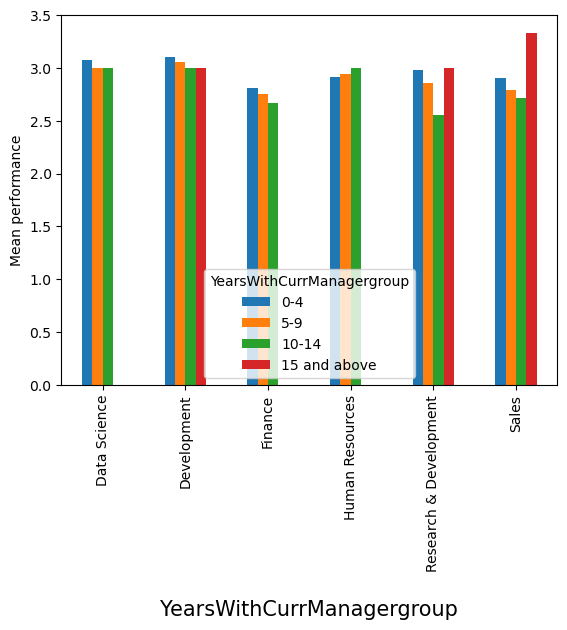

In [29]:
#visualizing the grouped features
for i in data2:
  plt.figure(figsize = (10,8))
  data2.groupby(['EmpDepartment',i])['PerformanceRating'].mean().unstack(level=1).plot(kind='bar')
  plt.xlabel(f'\n{i}', fontsize = 15)
  plt.ylabel('Mean performance')
  


1. In research and development department, the employees having an age bracket of 60-65 performed well. Finance and sales department hired employees who are 20 years and above. Those whose age bracket of 10-19 have good performance rating in four departments. 
2. Employees who travel a distance between  20 to 24 kilometers to work in data science department performed better than the others in  the department.
3. In the finance department, those who earned an hourly rate of 60-69 performed well.
4. Last salary hike percentage of between 20-24 motivated the employees to perform their duties well in all the departments except Research and developement
5. The employees having work experience between o and 9 in the company performed well in all the departments.
6. In all the departments, the employees who have an experience in the current job role between 0 and 4 years performed better.
7. In sales department, employees who worked under a manager for 15 years and above performed well.





In [30]:
#encode categorical variables using ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

#select all categorical variables
cat = data.select_dtypes(include = ['object'])

#apply ordinal encoder to categorical variables
encoder = OrdinalEncoder()
data[cat.columns] = encoder.fit_transform(cat)

data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1.0,2.0,2.0,5.0,13.0,2.0,10,3,4,...,4,10,2,2,10,7,0,8,0.0,3
1,47,1.0,2.0,2.0,5.0,13.0,2.0,14,4,4,...,4,20,2,3,7,7,1,7,0.0,3
2,40,1.0,1.0,1.0,5.0,13.0,1.0,5,4,4,...,3,20,2,3,18,13,1,12,0.0,4
3,41,1.0,0.0,0.0,3.0,8.0,2.0,10,4,2,...,2,23,2,2,21,6,12,6,0.0,3
4,60,1.0,2.0,2.0,5.0,13.0,2.0,16,4,1,...,4,10,1,3,2,2,2,2,0.0,3


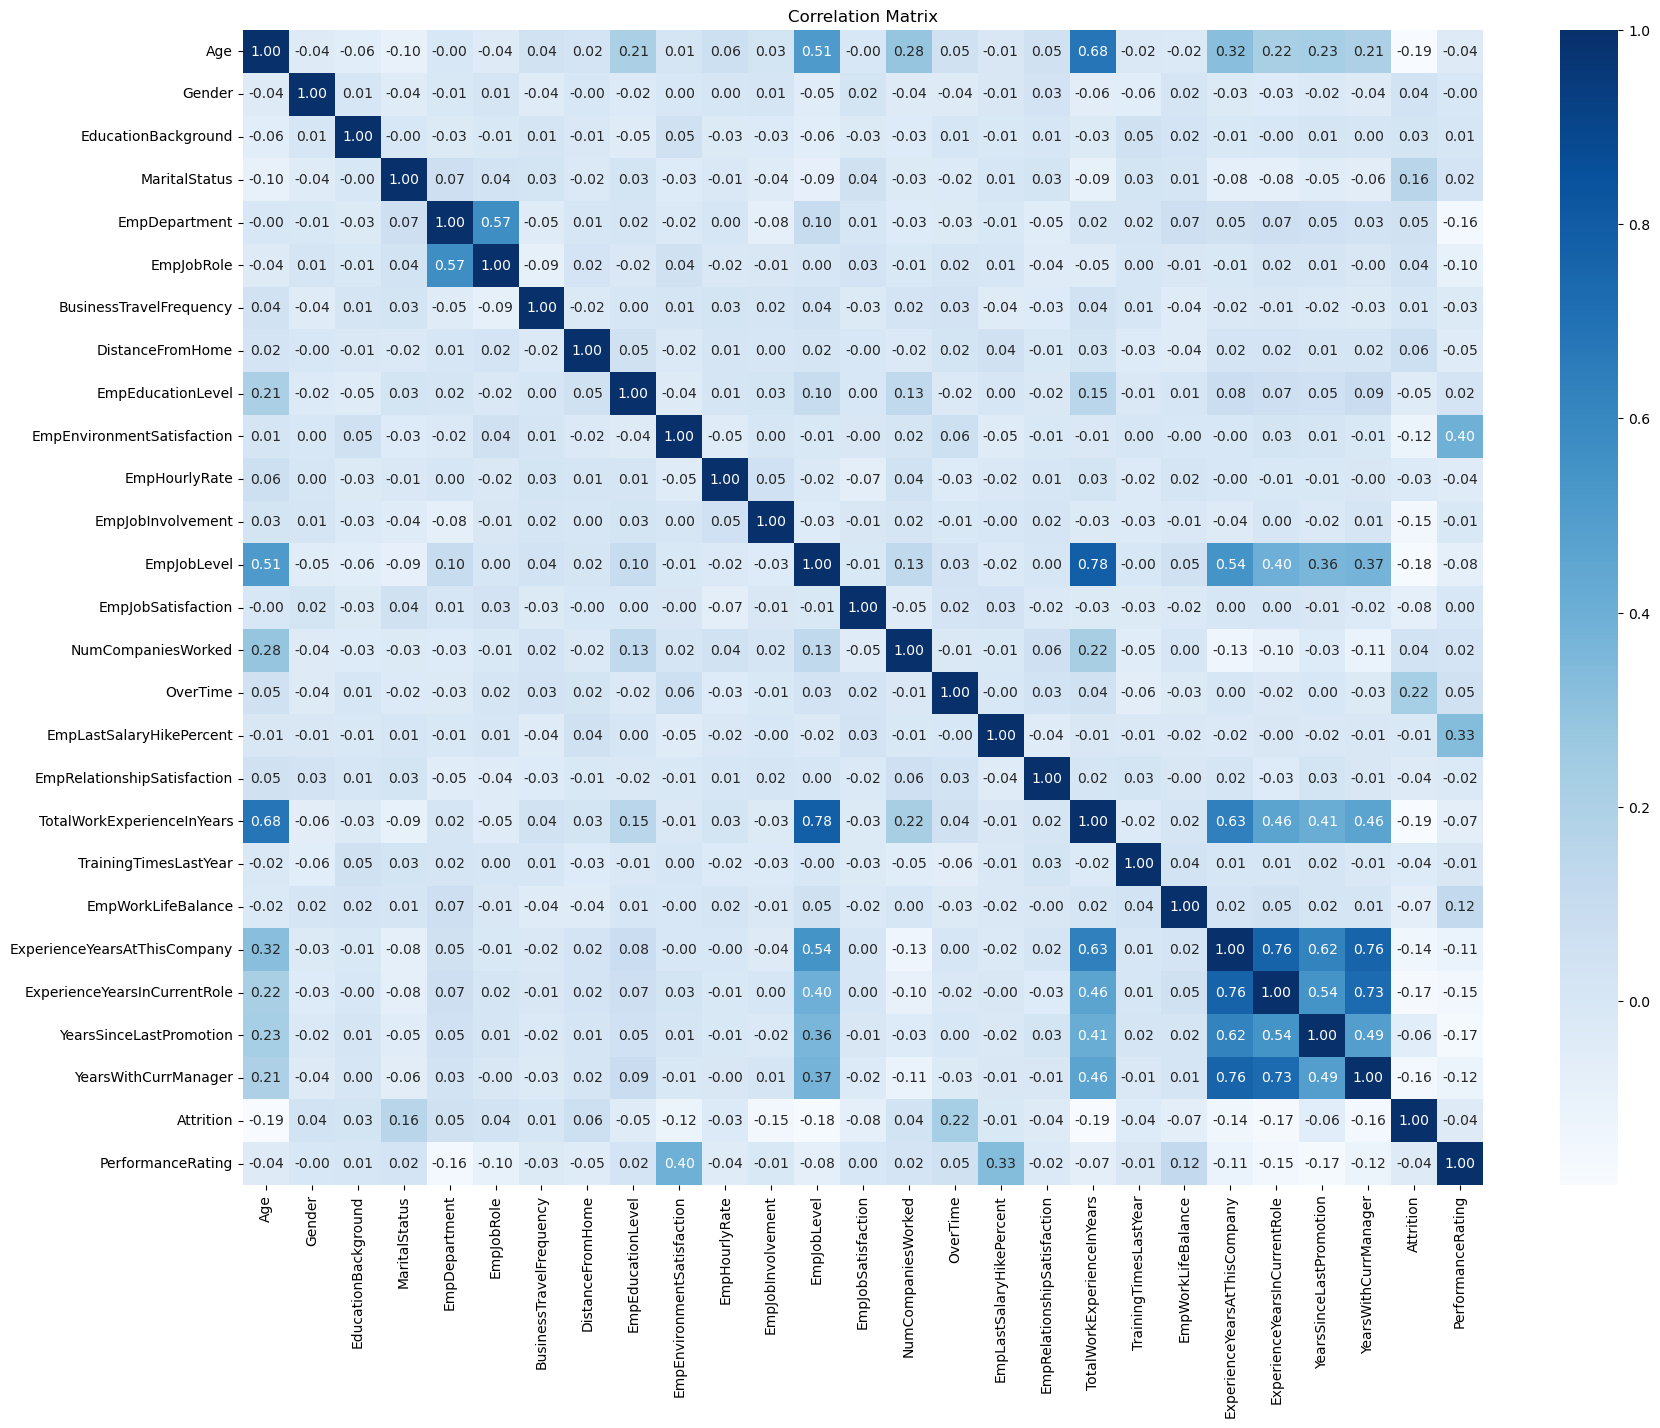

In [31]:
#plotting the heatmap to show correlation between features
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(), cmap = 'Blues', fmt = '.2f', annot = True)
plt.title('Correlation Matrix')
plt.show()

From the correlation, the following factors slightly affected the performance rating of an employee.
  1. Employee work life balance. It has a correlation coeffient of 0.12 with performance rating.
  2. Employee last salary hike percentage has a correlation coefficient of 0.33 with performance rating.
  3. Employee environment satisfaction has 0.40 correlation coefficient with performance rating.

# Machine Learning Model

In [57]:
#Importing sklearn modules
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [58]:
#Splitting the data into training and test sets
X = data.drop('PerformanceRating', axis = 1)
y = data['PerformanceRating']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Comparison of different Machine Learning Algorithm

logistic trained
logistic evaluated
              precision    recall  f1-score   support

           2       0.70      0.48      0.57        33
           3       0.85      0.92      0.88       179
           4       0.55      0.43      0.48        28

    accuracy                           0.80       240
   macro avg       0.70      0.61      0.64       240
weighted avg       0.79      0.80      0.79       240

Accuracy: 0.8041666666666667


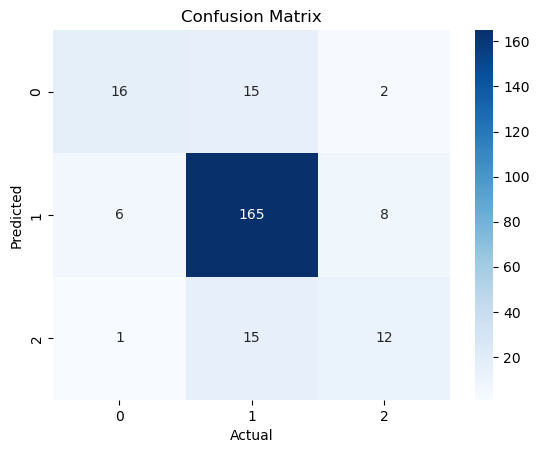

__________________________________________________________________________________________


Decissiontree trained
Decissiontree evaluated
              precision    recall  f1-score   support

           2       0.85      0.70      0.77        33
           3       0.92      0.96      0.94       179
           4       0.89      0.86      0.87        28

    accuracy                           0.91       240
   macro avg       0.89      0.84      0.86       240
weighted avg       0.91      0.91      0.91       240

Accuracy: 0.9125


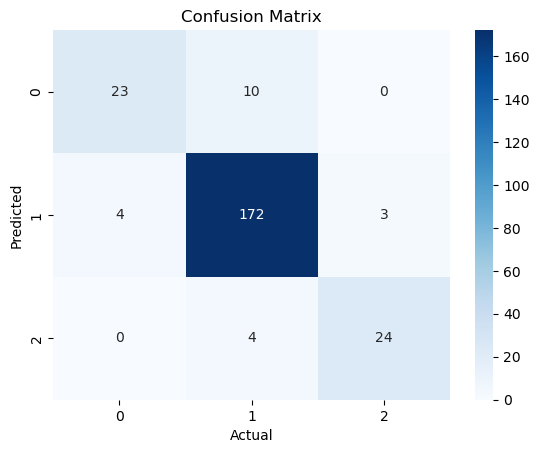

__________________________________________________________________________________________


RandomForest trained
RandomForest evaluated
              precision    recall  f1-score   support

           2       0.91      0.94      0.93        33
           3       0.97      0.98      0.98       179
           4       0.96      0.86      0.91        28

    accuracy                           0.96       240
   macro avg       0.95      0.93      0.94       240
weighted avg       0.96      0.96      0.96       240

Accuracy: 0.9625


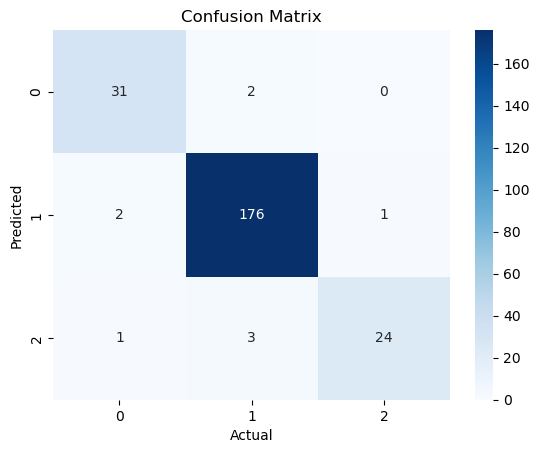

__________________________________________________________________________________________


kneighbours trained
kneighbours evaluated
              precision    recall  f1-score   support

           2       0.29      0.30      0.29        33
           3       0.79      0.85      0.82       179
           4       0.42      0.18      0.25        28

    accuracy                           0.70       240
   macro avg       0.50      0.45      0.46       240
weighted avg       0.68      0.70      0.68       240

Accuracy: 0.7


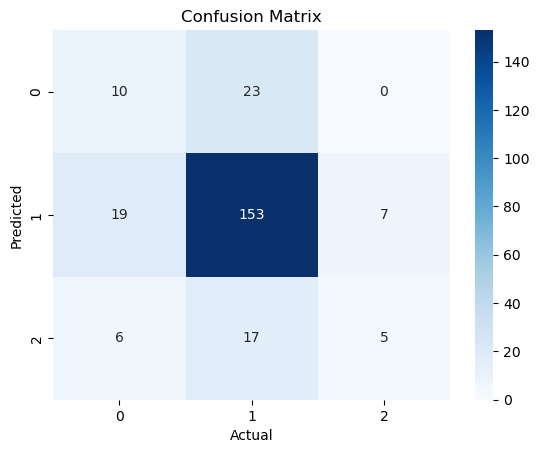

__________________________________________________________________________________________


Learning rate set to 0.5
0:	learn: 0.6466141	total: 2.49ms	remaining: 0us
CAT trained
CAT evaluated
              precision    recall  f1-score   support

           2       0.58      0.97      0.73        33
           3       0.95      0.85      0.90       179
           4       0.80      0.71      0.75        28

    accuracy                           0.85       240
   macro avg       0.78      0.84      0.79       240
weighted avg       0.88      0.85      0.86       240

Accuracy: 0.85


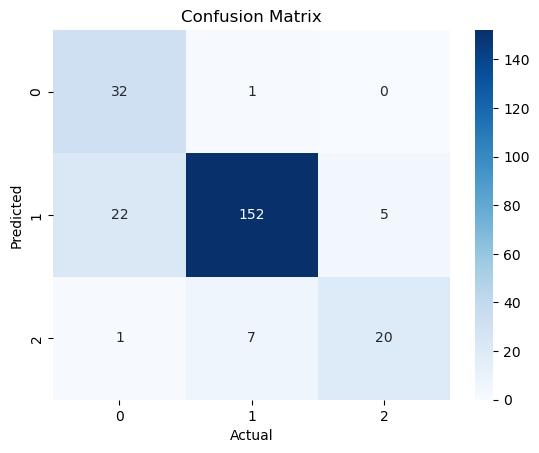

__________________________________________________________________________________________


svm trained
svm evaluated
              precision    recall  f1-score   support

           2       0.67      0.55      0.60        33
           3       0.88      0.93      0.91       179
           4       0.75      0.64      0.69        28

    accuracy                           0.85       240
   macro avg       0.77      0.71      0.73       240
weighted avg       0.84      0.85      0.84       240

Accuracy: 0.8458333333333333


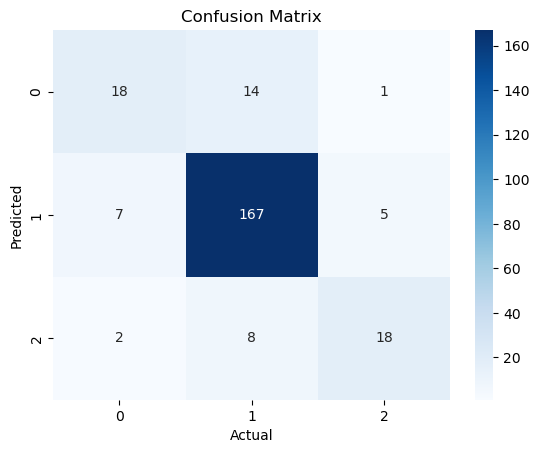

__________________________________________________________________________________________


NaiveB trained
NaiveB evaluated
              precision    recall  f1-score   support

           2       0.66      0.58      0.61        33
           3       0.88      0.92      0.90       179
           4       0.74      0.61      0.67        28

    accuracy                           0.84       240
   macro avg       0.76      0.70      0.73       240
weighted avg       0.83      0.84      0.83       240

Accuracy: 0.8375


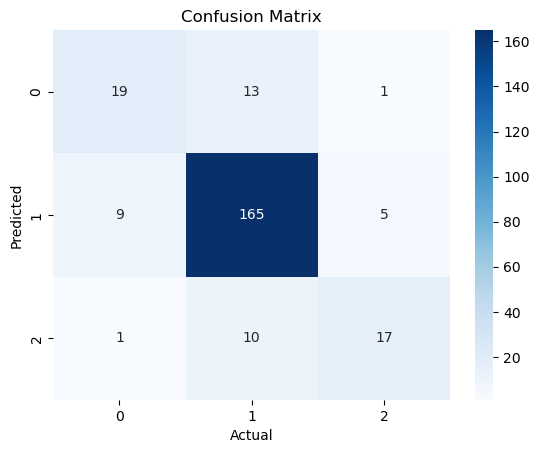

__________________________________________________________________________________________


LinearDA trained
LinearDA evaluated
              precision    recall  f1-score   support

           2       0.71      0.45      0.56        33
           3       0.88      0.94      0.91       179
           4       0.74      0.71      0.73        28

    accuracy                           0.85       240
   macro avg       0.78      0.70      0.73       240
weighted avg       0.84      0.85      0.84       240

Accuracy: 0.8458333333333333


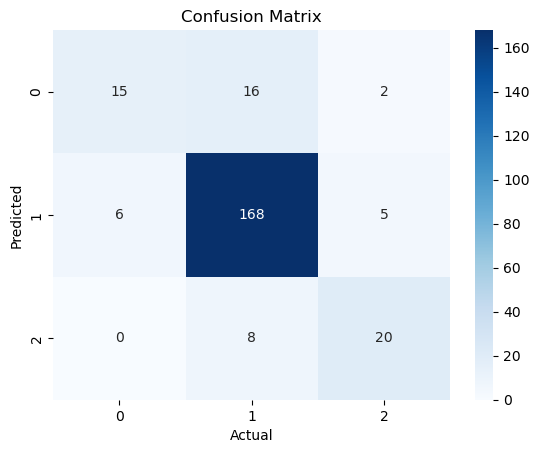

__________________________________________________________________________________________




In [66]:
# create a function to train and test the models
def models(X_train, y_train):
    models = {
    'logistic':LogisticRegression(),
    'Decissiontree': DecisionTreeClassifier(random_state=100),
    'RandomForest' : RandomForestClassifier(n_estimators=50, random_state=100),
    'kneighbours' : KNeighborsClassifier(n_neighbors=3),
    'CAT': CatBoostClassifier(iterations = 1),
    'svm' : SVC(kernel='linear', C=1, random_state=42),
    'NaiveB': GaussianNB(),
    'LinearDA': LinearDiscriminantAnalysis()}
    
    
     # loop through the models
    for name, model in models.items():
        model.fit(X_train, y_train)
        print(name + ' trained')
        y_pred = model.predict(X_test)
        print(name + ' evaluated')
        print(classification_report(y_test, y_pred))
        print("Accuracy:", accuracy_score(y_test, y_pred))
        cm = confusion_matrix(y_test, y_pred)
        cm_matrix = pd.DataFrame(data=cm)
        b =sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
        b.set(title='Confusion Matrix')
        b.set(xlabel='Actual', ylabel='Predicted')
        plt.show()
        
        print('___'*30)

        print('\n')
    
# call the model training function
models(X_train, y_train)


LogR: 0.772917 (0.046771)
LDA: 0.793750 (0.043899)
KNN: 0.682292 (0.046410)
CART: 0.865625 (0.038542)
NaiveB: 0.797917 (0.028028)
SVM: 0.723958 (0.017585)
RandF: 0.922917 (0.014878)


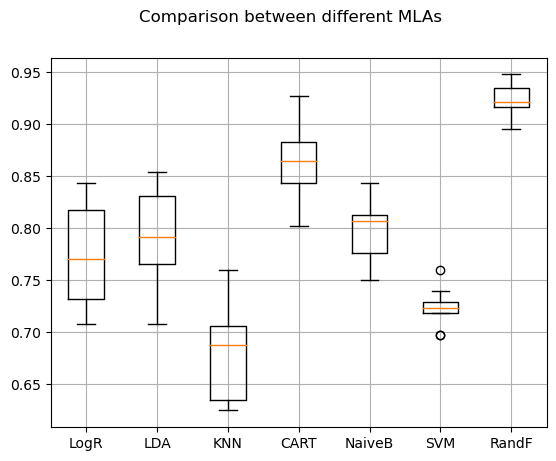

In [63]:
# Application of all Machine Learning methods
models = []
models.append(('LogR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NaiveB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RandF',RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=None)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
	print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.grid()
ax.set_xticklabels(names)
plt.show()

From the comparison of different Machine Learning Models, Random forest model performed well beacuse it has the highest f1 score of 96%. It predicted 94% correct values of good performance rating, 98% correct values of excellent performace and 91% correct values of outstanding performance rating.
This can also be clearly seen from the boxplot visualisation. Random Forest model has the highest mean of prediction and the lowest standard deviation amongst the seven machine learning models.

# ROC for multiclass Random Forest Classifier

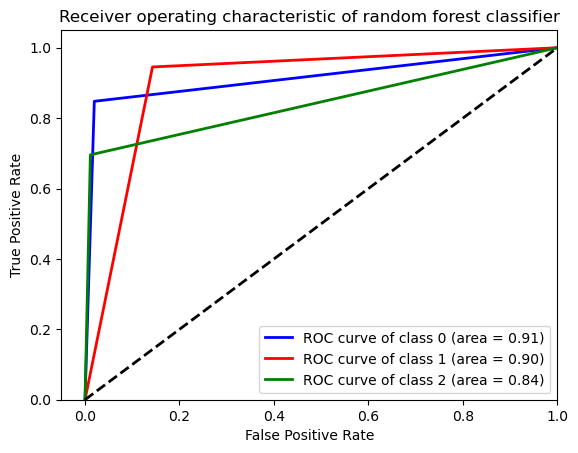

In [67]:
# Binarize the output
y = label_binarize(y, classes=[2, 3, 4])
n_classes = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(RandomForestClassifier(random_state=42))
y_score = classifier.fit(X_train, y_train).predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of random forest classifier')
plt.legend(loc="lower right")
plt.show()



The AUC for the low performance rating (blue line) is the highest followed by excellent performance rating (red line) and the last one is outstanding performance. The true positive rate for class 2 and 3 are closer to one in the top left corner. This indicates that the random forest model did well in predicting  the correct values of performance rating.

In [71]:
# Create and fit the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importances
importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
importances = importances.sort_values('importance', ascending=False)
print(importances)

                         feature  importance
16      EmpLastSalaryHikePercent    0.188769
9     EmpEnvironmentSatisfaction    0.170654
23       YearsSinceLastPromotion    0.098663
5                     EmpJobRole    0.048883
10                 EmpHourlyRate    0.040530
4                  EmpDepartment    0.039769
0                            Age    0.038407
18    TotalWorkExperienceInYears    0.037130
22  ExperienceYearsInCurrentRole    0.036879
21  ExperienceYearsAtThisCompany    0.036428
7               DistanceFromHome    0.032441
20            EmpWorkLifeBalance    0.026350
24          YearsWithCurrManager    0.025375
14            NumCompaniesWorked    0.025067
8              EmpEducationLevel    0.018980
19         TrainingTimesLastYear    0.018447
12                   EmpJobLevel    0.018232
17   EmpRelationshipSatisfaction    0.014870
3                  MaritalStatus    0.014542
13            EmpJobSatisfaction    0.014014
2            EducationBackground    0.013406
11        

The most important features that can be used for analysis are employee last salary hike and employee environment satisfaction. This is because their significance are above 10% with performance rating.  